### **PREDICTING THE PERCENTAGE OF AN STUDENT BASED ON THE NO. OF STUDY HOURS**





TASK : To perfoam a simple linear regression on the two variables student , studyhours.



In [3]:
# Importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading data from the url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data set of student/Hour")

data

Data set of student/Hour


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


to know the rows, columns , information about dataset

In [5]:
print("total rows in the dataset:",len(data))

print("total columns in the dataset:\n",data.columns)
i=data.info()   #  Information about the dataset
print(i)

total rows in the dataset: 25
total columns in the dataset:
 Index(['Hours', 'Scores'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


To know statistical meaures about the data

In [6]:
print("statistical information about dataset: \n ")
data.describe()

statistical information about dataset: 
 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# To check whether the data contains missing values or not
print("missing values :",data.isnull().sum().sum())

missing values : 0


ploting a regression graph between the variables

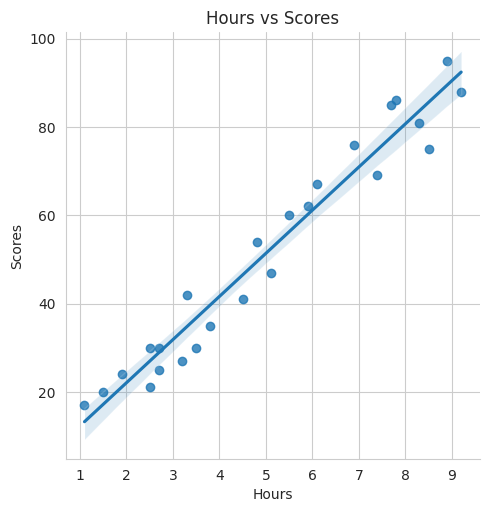

In [8]:
sns.set_style('whitegrid')
sns.lmplot(x='Hours', y = 'Scores', data = data).set(title='Hours vs Scores')

as the graph says that the variables are positively correlated. They have strong correlation according to pearson correaltion coefficent .

In [9]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

Using scikit-learn for spliting the training and testing the data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                            test_size=0.2, random_state=0)



Using direct linear regression model fit to impliment

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

plotting the graph by using seaborn and by using the the testing and training data

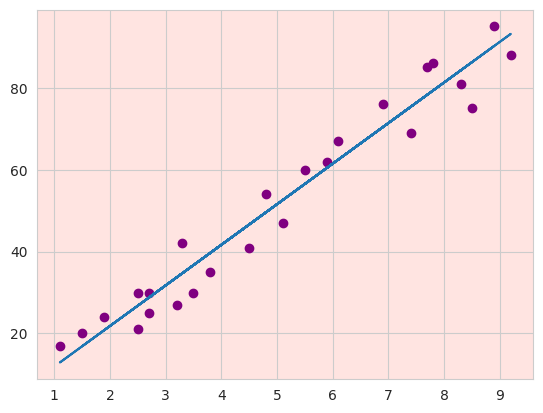

In [13]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
sns.set_style('whitegrid')
colors = ['purple']
plt.scatter(x, y,color=colors)
plt.plot(x, line)
ax = plt.gca()
ax.set_facecolor('mistyrose')

plt.show()

In [82]:
print(X_test) # Testing data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


to compare the actual data and predicted data after performing the model fitting

In [84]:
y_pred = reg.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


testing the data by usinga value given of 9.25

In [88]:
# You can also test with your own data
hours = np.array([9.25]).reshape(-1, 1)
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


Using r square for checking the accuracy

In [93]:
import numpy as np
from sklearn.metrics  import  r2_score
rmse = np.sqrt(r2_score(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.9723634553038979
